In [239]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
datos = pd.read_csv(r'/Users/pablouribepizarro/Desktop/Analisis de Datos/CitasEspecialidades.csv')
datos

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,EstadoCita,MotivoC,MotivoNA,MotivoS
0,1.211693e+10,2001-06-26,Mujer,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Nueva,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-12-30,2015-01-05,No Atendido,NaN,No se Presentó,NaN
1,1.274585e+10,2005-06-18,Hombre,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-04-03,2015-01-05,Atendido,NaN,NaN,NaN
2,1.248321e+10,2003-10-15,Hombre,Antofagasta,Antofagasta,II Región de Antofagasta,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-05-05,2015-01-05,No Atendido,NaN,No se Presentó,NaN
3,1.153553e+10,1998-02-18,Mujer,San Bernardo,Maipo,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
4,1.135475e+10,1996-06-08,Hombre,Vilcún,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
5,1.157893e+10,1998-12-08,Mujer,Coinco,Cachapoal,VI Región del Libertador General Bernardo O´Hi...,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
6,1.172271e+10,1999-09-02,Mujer,Molina,Curicó,VII Región del Maule,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
7,1.223425e+10,2002-11-03,Mujer,Coihueco,Ñuble,VIII Región del Bío Bío,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
8,1.147429e+10,1997-04-18,Hombre,Peñalolén,Santiago,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-10,2015-01-05,No Atendido,NaN,No se Presentó,NaN
9,1.200020e+10,2000-11-08,Mujer,Freire,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-21,2015-01-05,Atendido,NaN,NaN,NaN


In [207]:
#Transform Data into Numerical:

datos['FechaNac'] = pd.to_datetime(datos['FechaNac'])
datos['FechaReserva'] = pd.to_datetime(datos['FechaReserva'])
datos['FechaCita'] = pd.to_datetime(datos['FechaCita'])

#Feature Creation
datos['Edad'] = np.floor((datos['FechaReserva']-datos['FechaNac']).dt.days/365)
datos['DiasReservaCita'] = (datos['FechaCita']-datos['FechaReserva']).dt.days

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


column_list = [] #str columns
for column in datos.columns:
    if datos[column].dtype == 'O':
        column_list.append(column)

datos_num = datos[column_list].astype(str).apply(le.fit_transform)
for column in datos.columns:
    if datos[column].dtype != 'O':
        datos_num[column] = datos[column]




In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

0.64280361846933498

In [209]:
clf.feature_importances_

array([ 0.08340837,  0.34685447,  0.0963703 ,  0.06879648,  0.15898036,
        0.10619431,  0.00993819,  0.10269521,  0.02676231])

In [210]:
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion','Edad','DiasReservaCita']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion','Edad','DiasReservaCita']], datos_num['EstadoCita'])

0.85836674469087737

In [211]:
clf.feature_importances_

array([ 0.06494545,  0.19419843,  0.04108933,  0.03183918,  0.03750909,
        0.01747067,  0.00360271,  0.01608573,  0.00411713,  0.24956546,
        0.33957682])

In [244]:
datos.loc[datos['Sexo']== 'Hombre'].groupby(['EstadoCita']).count()

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,MotivoC,MotivoNA,MotivoS,Edad,DiasReservaCita
EstadoCita,,,,,,,,,,,,,,,,,,,
Agendado,98,98,98,95,89,89,98,98,98,98,98,98,98,98,0,0,27,98,98
Atendido,39142,39142,39142,38461,34316,34258,39142,39142,39142,39140,39142,39142,39142,39142,0,0,5384,39142,39142
Cancelado,12045,12045,12045,11810,10452,10420,12045,12045,12045,11973,12044,12044,12045,12045,11897,0,982,12045,12045
En Espera,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,0,5,5
No Atendido,11110,11110,11110,10898,9706,9678,11110,11110,11110,11108,11109,11109,11110,11110,0,11110,841,11110,11110
Tranferido,9,9,9,9,6,6,9,9,9,9,9,9,9,9,0,0,0,9,9


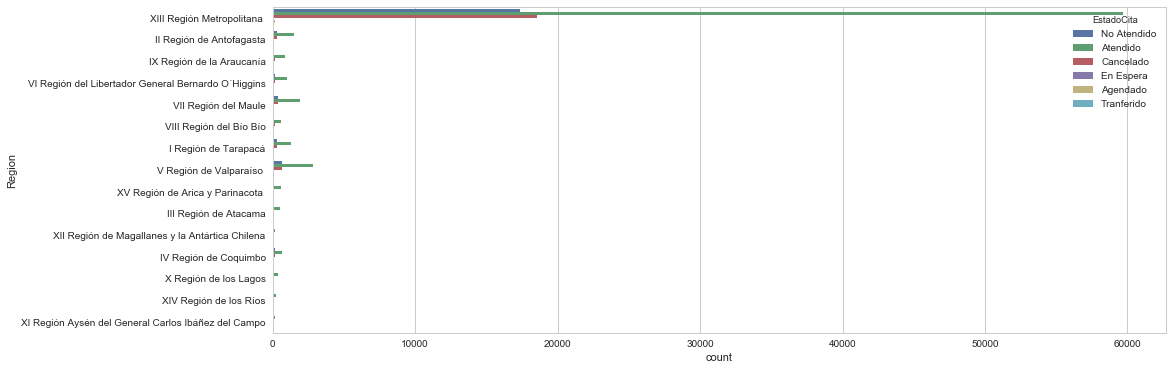

In [257]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(y="Region", hue="EstadoCita", data=datos, orient = "h")
